# PR3_PHDENGUE_ANALYSIS

# DATA ANALYST: ANDREW MATTHEW OAREZA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load our dataset


In [11]:
df = pd.read_csv(r"C:\Users\Matthew\Downloads\dengue.csv")

df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


## Check for null values


In [12]:
df.isnull().sum()


Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

## Let's convert the data types to its proper type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [25]:
df["Region"] = df["Region"].astype("category")
df["Flagged_Case_Outlier"] = df["Dengue_Cases"] > 20000
df.loc[df["Flagged_Case_Outlier"], "Dengue_Cases"] = np.nan
month_order = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)
df["Period"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str), errors="coerce")
sns.set(style="whitegrid")

## 1.Dengue Cases Over Time by Region

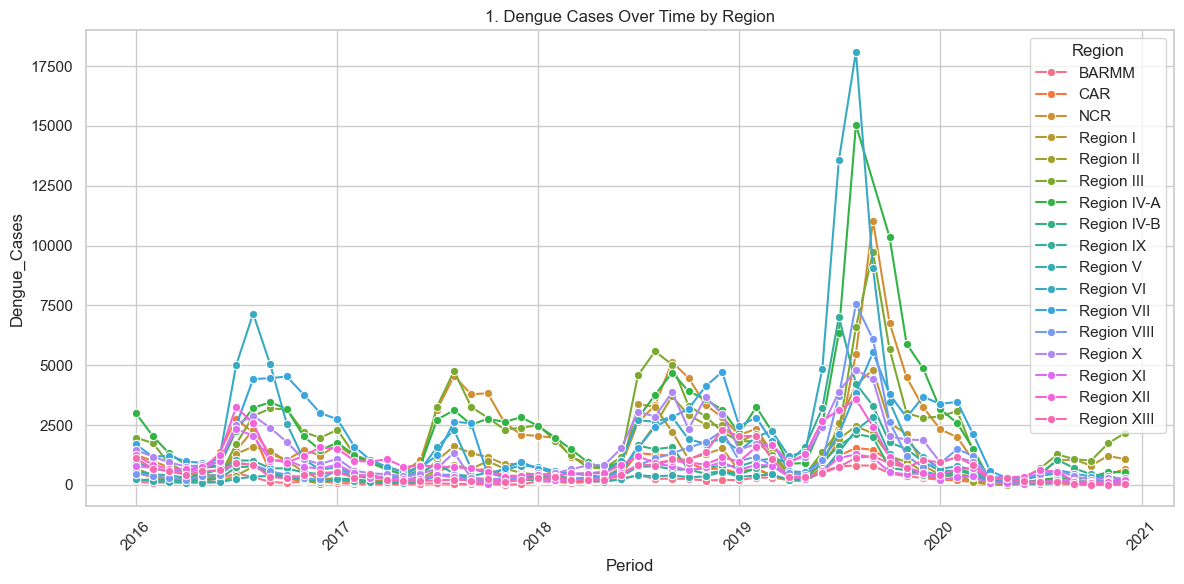

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Period", y="Dengue_Cases", hue="Region", marker="o")
plt.title("1. Dengue Cases Over Time by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The chart shows a clear national dengue outbreak in mid-2019, where Regions IV-A, III, and VI experienced the sharpest spikes, reaching up to nearly 18,000 monthly cas|es. This surge stands out as the most intense period of dengue transmission in the five-year span.

## 2.Total Dengue Cases by Region

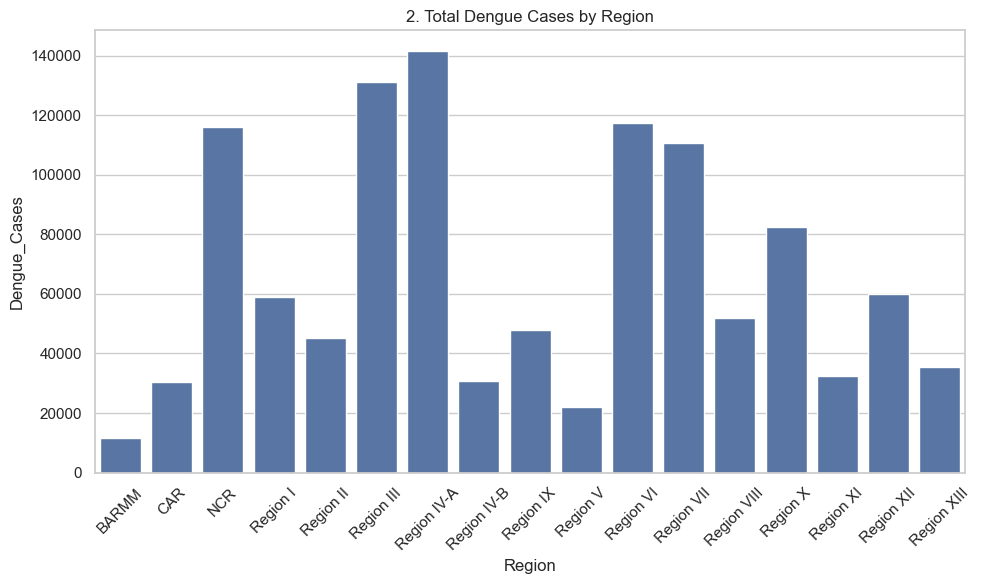

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Region", y="Dengue_Cases", estimator=sum, ci=None)
plt.title("2. Total Dengue Cases by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Region IV-A recorded the highest total number of dengue cases, followed closely by Region III and Region VI. These three regions had significantly higher case counts than others, indicating that they were the most affected areas over the five-year period. 

## 3.Monthly Average Dengue Cases

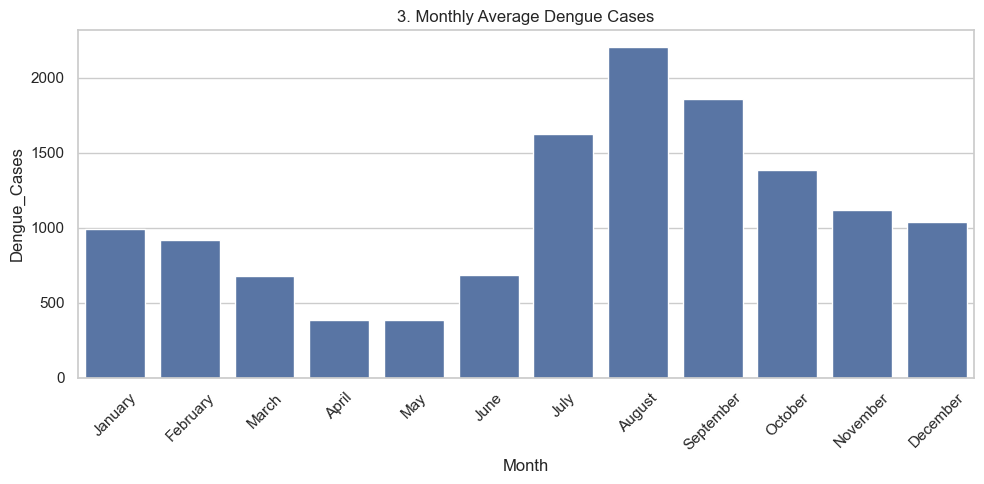

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Month", y="Dengue_Cases", estimator=np.mean, ci=None)
plt.title("3. Monthly Average Dengue Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### This pattern highlights a clear seasonal trend, with the most intense transmission during the rainy season (June to September) when mosquito breeding conditions are ideal. It suggests that prevention efforts should be ramped up before July, especially in high-risk regions.

## 4.Heatmap of Dengue Cases by Region and Year

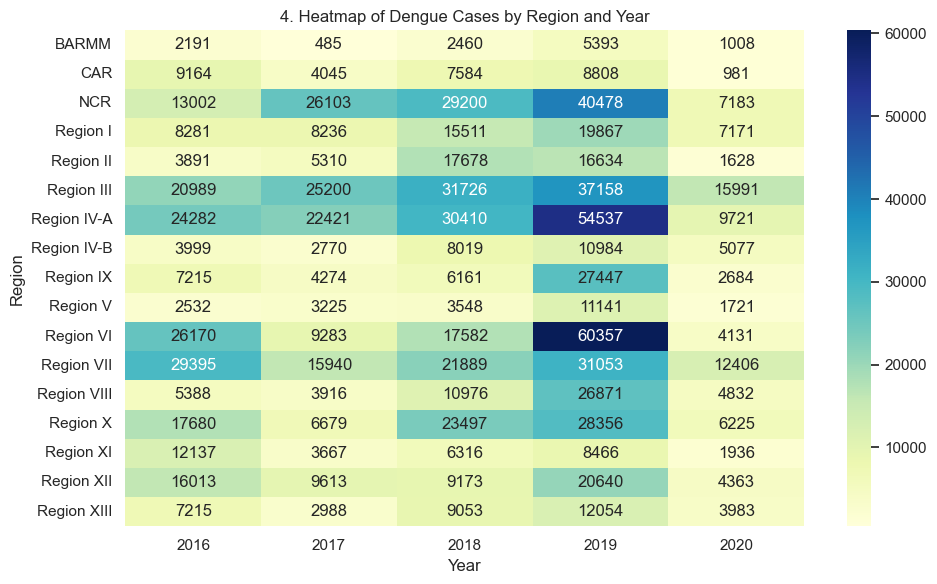

In [32]:
pivot = df.pivot_table(values="Dengue_Cases", index="Region", columns="Year", aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("4. Heatmap of Dengue Cases by Region and Year")
plt.tight_layout()
plt.show()



### From 2020 onward, there’s a notable drop in cases across all regions, likely due to COVID-19-related lockdowns, mobility restrictions, and changes in healthcare reporting or behavior. This visual confirms both long-term regional disparities and the exceptional scale of the 2019 outbreak, emphasizing where surveillance and intervention should be most concentrated.

## 5. Dengue Case Distribution by Month

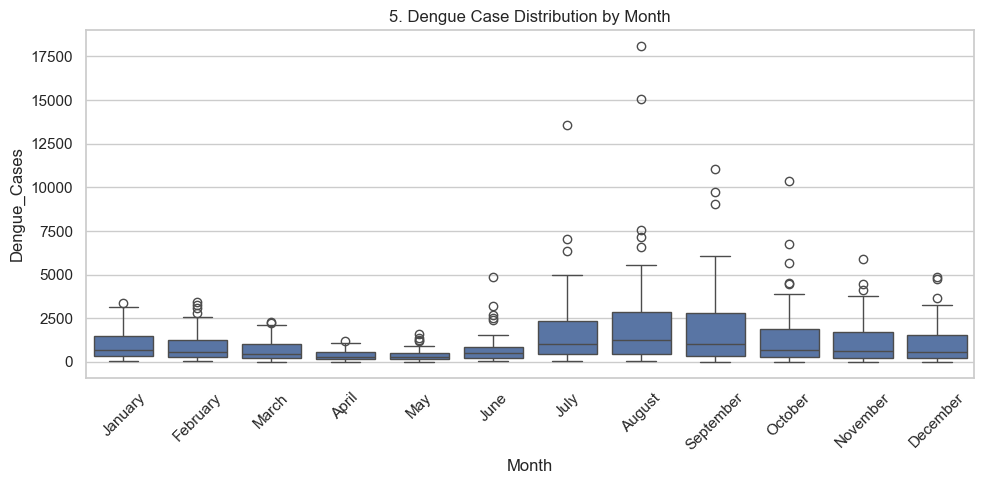

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Month", y="Dengue_Cases")
plt.title("5. Dengue Case Distribution by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dengue cases vary widely by month. July, August, and September show the highest distributions, with many extreme values (outliers), indicating these are peak months for transmission. April and May have the lowest and most stable case counts. The overall pattern confirms dengue is highly seasonal, with significant spikes mid-year.

## 6. Top 10 Highest Monthly Case Records

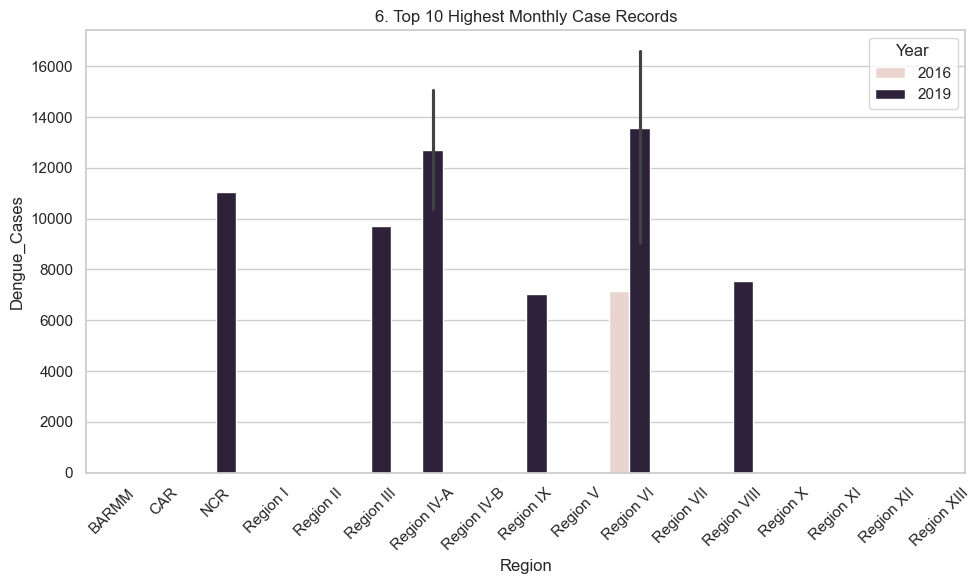

In [34]:
top10 = df.sort_values("Dengue_Cases", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="Region", y="Dengue_Cases", hue="Year")
plt.title("6. Top 10 Highest Monthly Case Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Most of the highest monthly dengue case records occurred in 2019, with Region VII, Region IV-A, and Region VI leading in peak monthly values. One notable exception is Region VI, which also had a significant case spike in 2016, suggesting it experienced major outbreaks in multiple years. The dominance of 2019 in these extreme case counts reinforces that year as the most severe period in the dataset.

## 7. Total Dengue Cases by Year

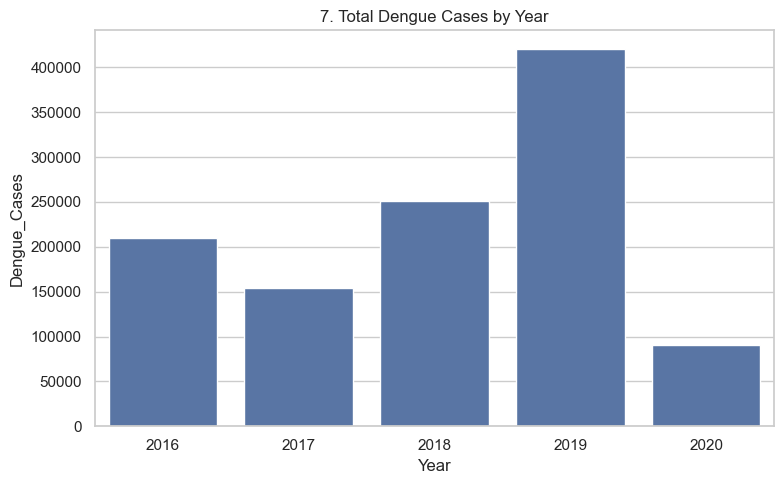

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Year", y="Dengue_Cases", estimator=sum, ci=None)
plt.title("7. Total Dengue Cases by Year")
plt.tight_layout()
plt.show()


### Dengue cases showed a fluctuating trend from 2016 to 2020, with a dramatic spike in 2019 reaching over 420,000 reported cases. This makes 2019 the most severe outbreak year in the dataset. In contrast, 2020 saw a sharp decline, likely influenced by pandemic-related mobility restrictions and healthcare shifts. The trend suggests periodic surges every few years, emphasizing the need for early detection and preemptive public health planning.

## 8. Dengue Case Trends in Top 3 Regions

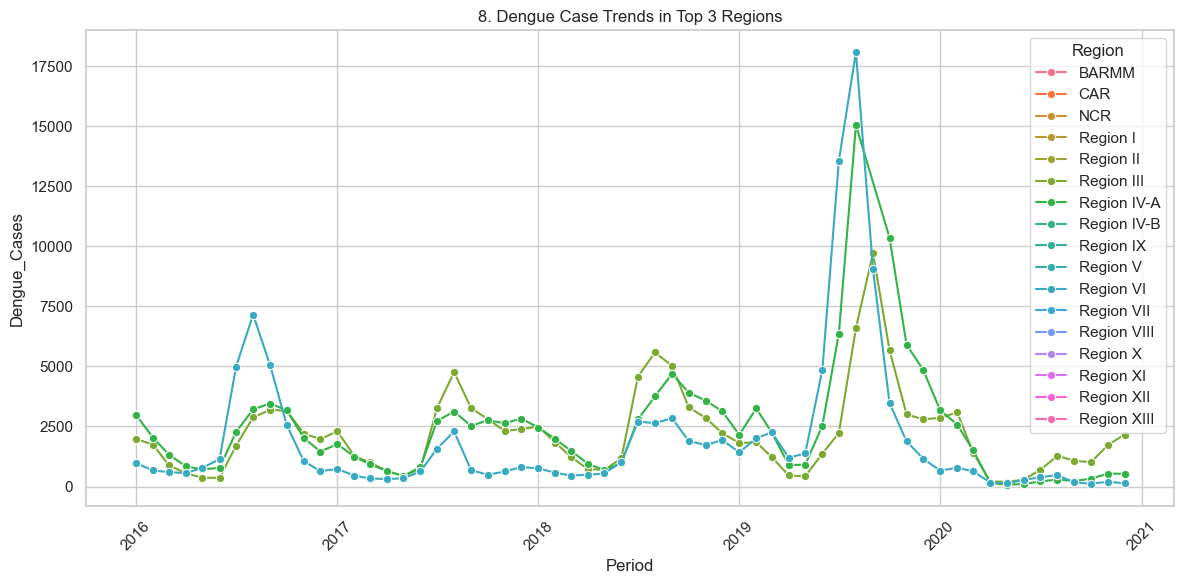

In [36]:
top3 = df.groupby("Region")["Dengue_Cases"].sum().nlargest(3).index
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df["Region"].isin(top3)], x="Period", y="Dengue_Cases", hue="Region", marker="o")
plt.title("8. Dengue Case Trends in Top 3 Regions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Regions IV-A, III, and VI consistently show the highest dengue case counts across the years, with all three experiencing a sharp and simultaneous spike in mid to late 2019. Region VI recorded the most pronounced peak, nearing 18,000 monthly cases. Despite slight fluctuations before and after 2019, the trend clearly identifies these regions as persistent dengue hotspots. Their similar seasonal patterns suggest shared environmental or urban risk factors driving outbreaks.

## 9. Region-wise Case Variability 

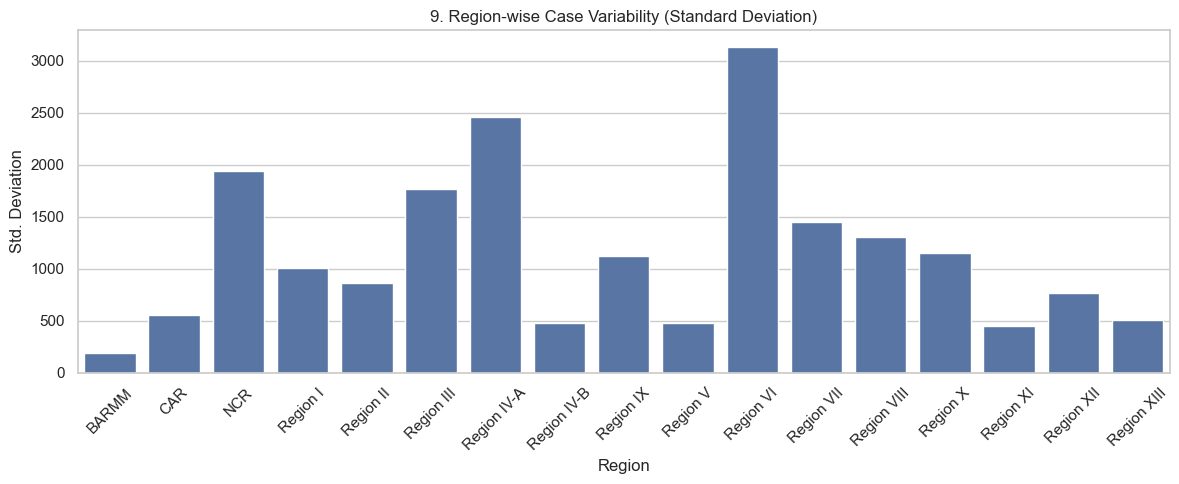

In [37]:
variability = df.groupby("Region")["Dengue_Cases"].std().dropna().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=variability.index, y=variability.values)
plt.title("9. Region-wise Case Variability (Standard Deviation)")
plt.ylabel("Std. Deviation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Region VI has the highest standard deviation in dengue cases, indicating that its case numbers fluctuate the most over time, likely due to repeated outbreaks. Regions IV-A and NCR also show high variability, suggesting they experience both sharp surges and lulls in transmission. In contrast, regions like BARMM, Region IV-B, and Region XI have much lower variability, reflecting more stable or consistently low case counts. High variability is a sign of unpredictable outbreaks and signals the need for stronger surveillance and early-response strategies in affected regions.

## 10. Monthly Trends in Dengue Cases by Year

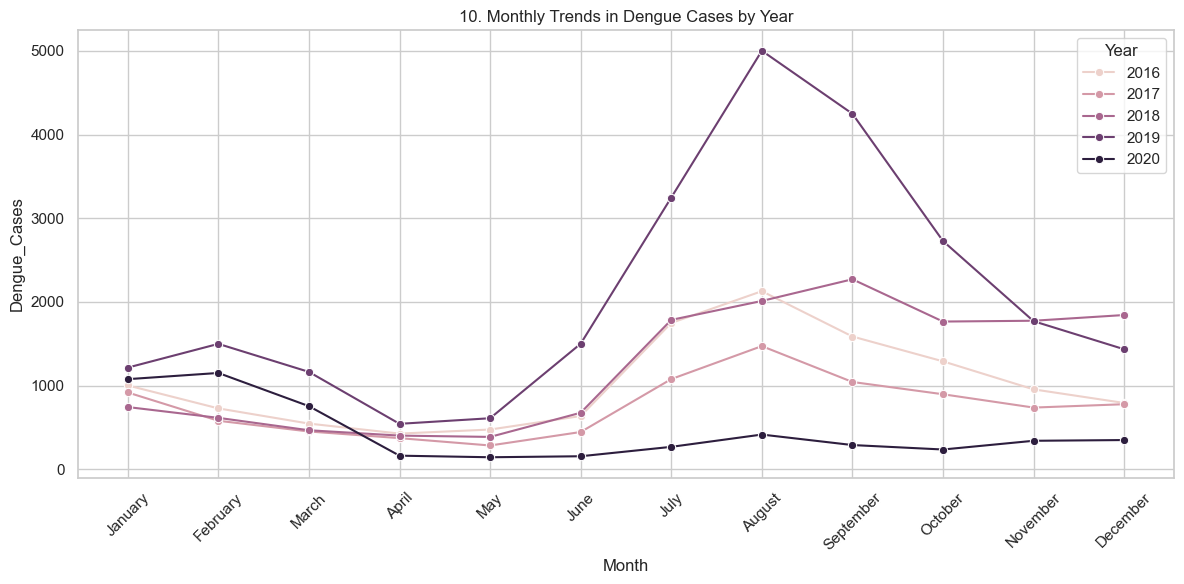

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Dengue_Cases", hue="Year", estimator=np.mean, marker="o", ci=None)
plt.title("10. Monthly Trends in Dengue Cases by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Across all years, dengue cases consistently follow a seasonal pattern with the sharpest rise beginning in June, peaking around August or September, and declining toward the end of the year. The year 2019 clearly stands out, showing a much higher and steeper peak compared to other years, confirming it as the most severe outbreak period.